In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


# A

In [2]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/A/**/*.dat'))

In [3]:
len(dat_files)

108

In [4]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.min())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [5]:
op_age_fac=[] 
cohesion=[] 
fc=[]
Edf=[]

counter = 1
for a in [0.2, 1.0, 2.0]:
    for b in [0.5, 1.0, 2.0, 4.0]:
        for c in [0.5, 1.0, 2.0]:
            for d in [0.1, 1.0, 10.0]:     
                op_age_fac.append(a)
                cohesion.append(b)
                fc.append(c)
                Edf.append(d)
                #print(counter, a, b, c, d)
                counter += 1


In [6]:

newdf['op_age_fac'] = op_age_fac #Constant viscosity crust an inteface
newdf['cohesion'] = cohesion
newdf['fc'] = fc
newdf['Edf'] = Edf

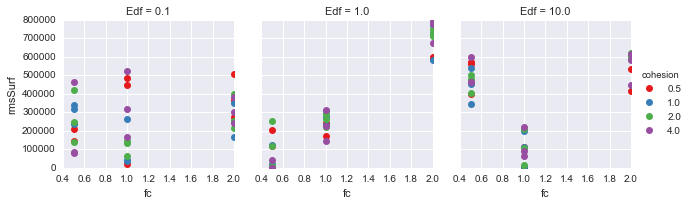

In [7]:
yaxis = columns[22] #'rmsSurf'#, 'nuTop' #


kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf,  col = 'Edf', hue="cohesion", palette="Set1")
g = g.map(plt.plot, 'fc', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()


In [8]:
#newdf['subzone']

In [9]:
newdf['plateness'].idxmax(), newdf['plateness'].max()

(87, 0.35602342529299996)

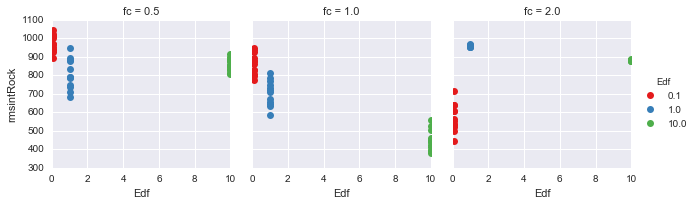

In [10]:
yaxis = 'rmsintRock' #'rmsSurf'#, 'nuTop' #


kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="fc", hue="Edf", palette="Set1")
g = g.map(plt.plot, 'Edf', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()


rmsintRock


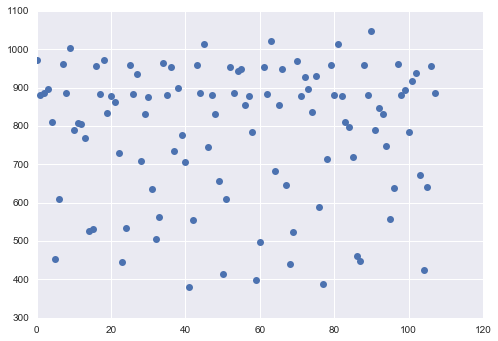

In [11]:
#filt_rows = [1, 5, 23]
col = 2

print(columns[col])

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
#    plt.plot(newdf[[col]].iloc[[i]], marker="o", linestyle="", label = str(np.arange(0, newdf.shape[0])[i]))
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot( newdf[[col]], marker="o", linestyle="")
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


# B

In [19]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/B/**/*.dat'))


In [61]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False).dropna()
    data.append(df.max())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [62]:
#newdf

eta_min_crust = []
eta_max_crust= []
eta_min_interface=[]
eta_max_interface=[]
cc=[]
ci=[]
fcc=[]
fci=[]
for a in [0.01, 0.1, 1.0]:
    for b in [1.0, 10.0, 100.0, 1000.]:
        for c in [1.0, 0.1, 0.01]:
            for d in [1.0, 0.1, 0.01]:
                eta_min_crust.append(a) 
                eta_min_interface.append(a) 
                eta_max_crust.append(b)
                eta_max_interface.append(b)
                cc.append(c)
                ci.append(c)
                fcc.append(d)
                fci.append(d)

newdf['eta_min_crust'] = eta_min_crust
newdf['eta_max_crust'] = eta_max_crust
newdf['eta_min_interface'] = eta_min_interface
newdf['eta_max_interface'] = eta_max_interface
newdf['cc'] = cc
newdf['ci'] = ci
newdf['fcc'] = fcc
newdf['fci'] = fci

In [63]:
eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]
RES=[]

counter = 1
for a in [0.1, 0.5, 1.0, 2.0, 10.]:
    for b in [0.8, 1.2, 1.6]:
        for c in [0.5, 1.0, 2.0]:
            for d in [128, 192]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                MANTLETOCRUST.append(b)
                eta0.append(c)
                RES.append(d)
                #print(counter, a, b, c, d)
                counter += 1


In [73]:

newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0
newdf['RES'] = RES

newdf['eta_min_crust'] = eta_min_crust/newdf['eta0'] 
newdf['eta_max_crust'] = eta_max_crust/newdf['eta0'] 
newdf['eta_min_interface'] = eta_min_interface/newdf['eta0'] 
newdf['eta_max_interface'] = eta_max_interface/newdf['eta0']  #Constant viscosity crust an inteface

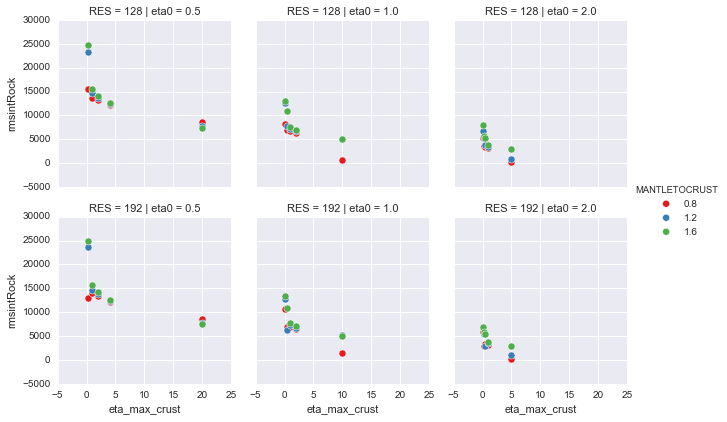

In [74]:
yaxis = 'rmsintRock' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()



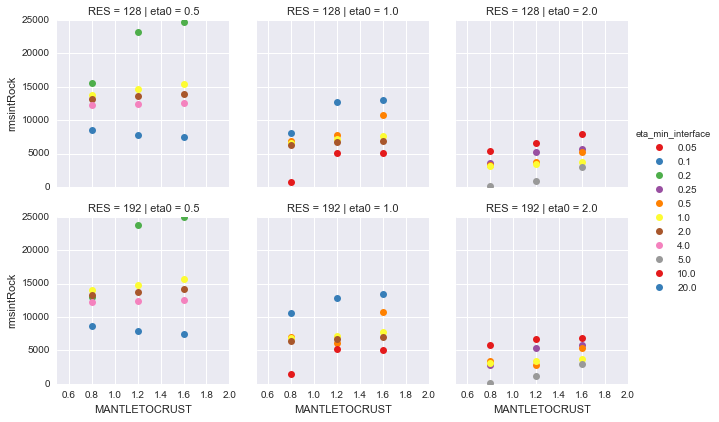

In [75]:
yaxis = 'rmsintRock' #'rmsSurf'#, , 'nuTop'#

kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue='eta_min_interface', palette="Set1")
g = g.map(plt.plot, 'MANTLETOCRUST',  yaxis, **kws).add_legend().set(xlim=(0.5, 2.0))


#here we use plt.plot as a hack, because scatter was not mapping the hue colours correctly
#https://github.com/mwaskom/seaborn/issues/840

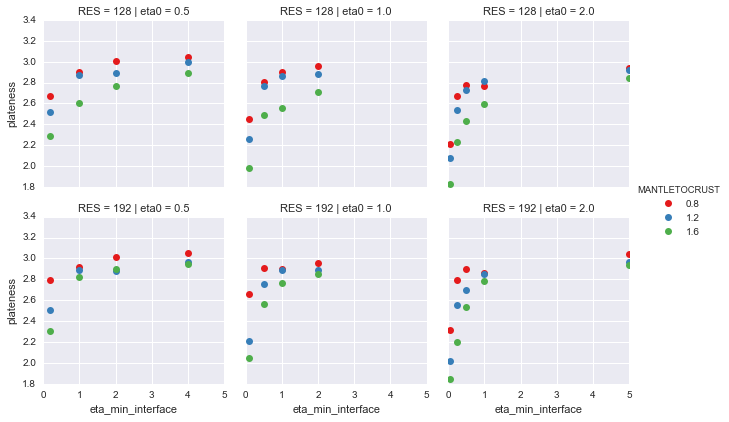

In [78]:
yaxis = 'plateness' #'rmsSurf'#, , 'nuTop'#

kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue='MANTLETOCRUST', palette="Set1")
g = g.map(plt.plot, 'eta_min_interface',  yaxis, **kws).add_legend().set(xlim=(0., 5.0))


#here we use plt.plot as a hack, because scatter was not mapping the hue colours correctly
#https://github.com/mwaskom/seaborn/issues/840

ndp.subzone


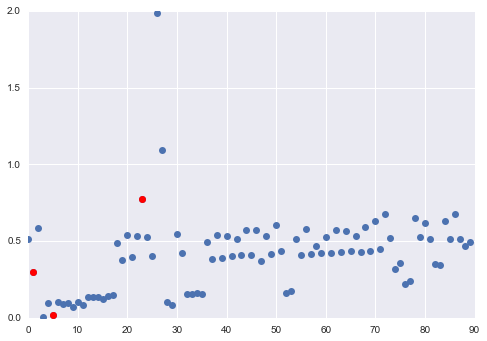

In [69]:
filt_rows = [1, 5, 23]
col = 26

print(columns[col])

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
#    plt.plot(newdf[[col]].iloc[[i]], marker="o", linestyle="", label = str(np.arange(0, newdf.shape[0])[i]))
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot(newdf[[col]], marker="o", linestyle="")
plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()



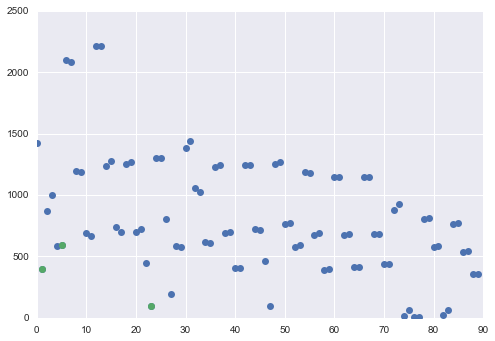

In [70]:
filt_rows = [1, 5, 23]

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot(newdf['rmsintLith'] - newdf['rmsintLower'], marker="o", linestyle="")
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
plt.plot(newdf.iloc[filt_rows ]['rmsintLith'] - newdf.iloc[filt_rows ]['rmsintLower'], marker="o", linestyle="")

#plt.legend()


In [71]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']

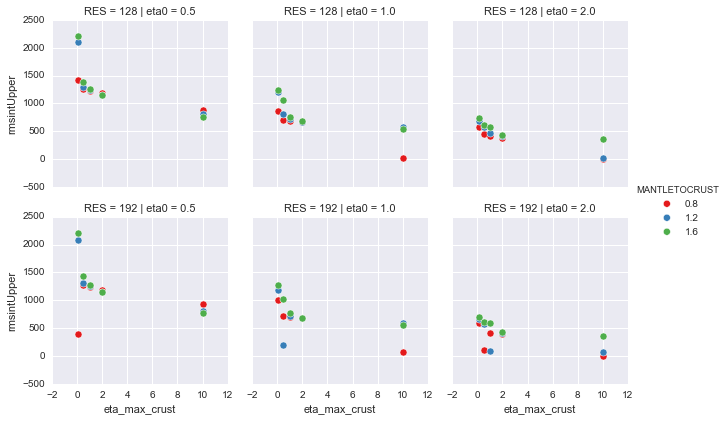

In [72]:
yaxis = 'rmsintUpper' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()

In [59]:
newdf[(newdf.eta0 > 1.0) &
      (newdf.MANTLETOCRUST <= 1.) &
      (newdf.rmsintUpper < 400.) &
      (newdf.eta_max_crust <= 1.0)
     ]

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,ndp.subzone,realtime,eta_min_crust,eta_max_crust,eta_min_interface,eta_max_interface,MANTLETOCRUST,eta0,RES,rmsintUpper
4,4.0,3.719123,2998.216217,117.558578,1.205206e+08,0.663136,0.398896,807.384641,-148.280814,5.179100e+07,...,-0.054183,0.000987,0.1,0.1,0.1,0.1,0.8,2.0,128,357.862379
5,4.0,3.782584,3043.905165,98.041735,1.003675e+08,0.469283,0.261989,672.638028,-135.648311,4.445907e+07,...,-0.048177,0.000379,0.1,0.1,0.1,0.1,0.8,2.0,192,235.408061
22,4.0,3.730465,2028.899456,81.231367,8.319200e+07,0.606241,0.351112,576.166162,-103.603401,5.160383e+07,...,0.323674,0.001104,0.5,0.5,0.5,0.5,0.8,2.0,128,204.414249
23,4.0,3.754450,1216.342227,39.279016,4.033063e+07,0.544502,0.311327,267.033315,-61.580154,2.294563e+07,...,0.019051,0.000850,0.5,0.5,0.5,0.5,0.8,2.0,192,47.271389
40,4.0,3.731415,2032.693740,81.416114,8.329380e+07,0.599192,0.344878,572.855947,-103.395154,5.292540e+07,...,0.325144,0.001114,1.0,1.0,1.0,1.0,0.8,2.0,128,200.514313
41,4.0,3.762313,1841.399473,65.496456,6.700758e+07,0.513976,0.287927,465.829855,-88.158811,4.230132e+07,...,0.231399,0.000724,1.0,1.0,1.0,1.0,0.8,2.0,192,125.122567


In [79]:
newdf.iloc[filt_rows ]

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,ndp.subzone,realtime,eta_min_crust,eta_max_crust,eta_min_interface,eta_max_interface,MANTLETOCRUST,eta0,RES,rmsintUpper
1,4.0,3.815297,13049.266817,490.949739,2.014180e+09,0.499047,0.288649,2608.179539,-59.461733,8.637853e+08,...,0.296875,0.000303,0.20,0.20,0.20,0.20,0.8,0.5,192,396.440031
5,4.0,3.814918,5833.682799,240.389145,2.456664e+08,0.542713,0.313962,1442.335676,-20.393164,9.020000e+07,...,0.015625,0.000639,0.05,0.05,0.05,0.05,0.8,2.0,192,589.368074
23,4.0,3.814556,2849.856680,101.130712,1.037328e+08,0.756376,0.457344,602.616052,-12.834485,4.363065e+07,...,0.776042,0.001990,0.25,0.25,0.25,0.25,0.8,2.0,192,99.739551


In [91]:
#0.01194*670

## D

In [45]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/D/**/*.dat'))

In [52]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.mean())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [53]:
eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]


counter = 1
for a in [0.1, 0.5, 1.0, 2.0, 5.]:
    for b in [0.5, 1.0, 2.0]:
        for c in [0.75, 1.0]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                eta0.append(b)
                MANTLETOCRUST.append(c)
                print(counter, a, b, c)
                counter += 1

(1, 0.1, 0.5, 0.75)
(2, 0.1, 0.5, 1.0)
(3, 0.1, 1.0, 0.75)
(4, 0.1, 1.0, 1.0)
(5, 0.1, 2.0, 0.75)
(6, 0.1, 2.0, 1.0)
(7, 0.5, 0.5, 0.75)
(8, 0.5, 0.5, 1.0)
(9, 0.5, 1.0, 0.75)
(10, 0.5, 1.0, 1.0)
(11, 0.5, 2.0, 0.75)
(12, 0.5, 2.0, 1.0)
(13, 1.0, 0.5, 0.75)
(14, 1.0, 0.5, 1.0)
(15, 1.0, 1.0, 0.75)
(16, 1.0, 1.0, 1.0)
(17, 1.0, 2.0, 0.75)
(18, 1.0, 2.0, 1.0)
(19, 2.0, 0.5, 0.75)
(20, 2.0, 0.5, 1.0)
(21, 2.0, 1.0, 0.75)
(22, 2.0, 1.0, 1.0)
(23, 2.0, 2.0, 0.75)
(24, 2.0, 2.0, 1.0)
(25, 5.0, 0.5, 0.75)
(26, 5.0, 0.5, 1.0)
(27, 5.0, 1.0, 0.75)
(28, 5.0, 1.0, 1.0)
(29, 5.0, 2.0, 0.75)
(30, 5.0, 2.0, 1.0)


In [54]:

newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0

newdf['eta_min_crust'] = eta_min_crust/newdf['eta0'] 
newdf['eta_max_crust'] = eta_max_crust/newdf['eta0'] 
newdf['eta_min_interface'] = eta_min_interface/newdf['eta0'] 
newdf['eta_max_interface'] = eta_max_interface/newdf['eta0'] 

In [55]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']


newdf['rmsSurfScaled'] = (newdf['rmsSurf']/(2900.*1e3/1e-6))*(10.*3600*24*365)

In [56]:
#newdf['rmsSurfScaled']

time scaling:

The following should be in cm/y. 

Demonstrating that for these models, there is still quite a bit too much bouyancy in the system

the default eta0 is 2e20, so the only models that have near-earth-like plate velocities are thise with eta0 *=2, i.e. eta0 = 4e20, and even then, only at the highest plate interface strengths.


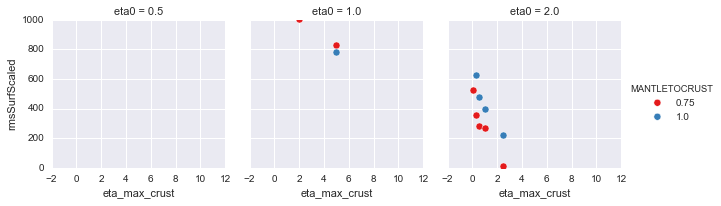

In [57]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0", hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()


g.set(ylim=(0, 1000))
plt.show()

## Scratch

In [3]:
#rdir = '/workspace'
rdir = '../../..'

columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone', 'realtime' ]


In [7]:
#r2 = rdir + '/temp_results/results_modelT_2.dat'
r3 = rdir + '/temp_results/results_modelT_3.dat'

#df2 = pd.read_csv(r2, sep="\s*", header=None,  index_col=False).dropna() #kaplan, res =  160 
df3 = pd.read_csv(r3, sep="\s*", header=None,  index_col=False).dropna() #kaplan, res =  192

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [9]:
#df2.columns = columns
df3.columns = columns

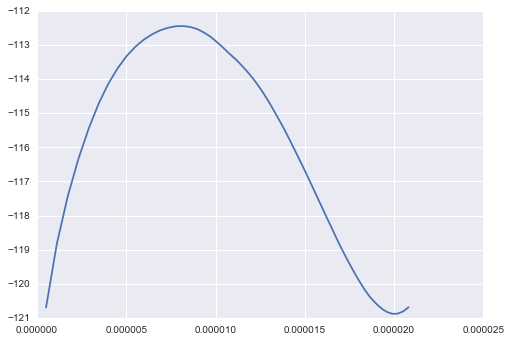

In [10]:
#plt.plot(df2['realtime'], df2['nuTop'],  linestyle="--")
plt.plot(df3['realtime'], df3['nuTop'],  linestyle="-")

In [19]:
t4 = rdir + '/temp_results/results_modelT_4.dat'
d5 = rdir + '/temp_results/results_modelD_5.dat'
d6 = rdir + '/temp_results/results_modelD_6.dat'

In [21]:
dft4 = pd.read_csv(t4, sep="\s*", header=None,  index_col=False).dropna() 
dfd5 = pd.read_csv(d5, sep="\s*", header=None,  index_col=False).dropna() 
dfd6 = pd.read_csv(d6, sep="\s*", header=None,  index_col=False).dropna() 


dft4.columns = columns
dfd5.columns = columns
dfd6.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warnin

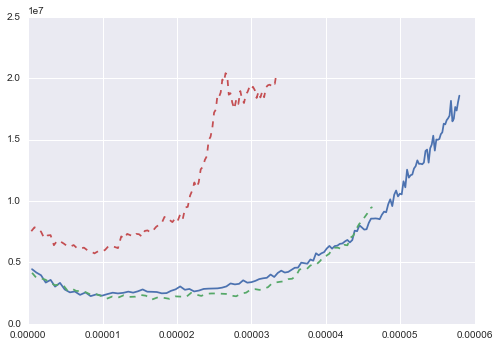

In [22]:
plt.plot(dft4['realtime'], dft4['rmsSurf'],  linestyle="-")
plt.plot(dfd5['realtime'], dfd5['rmsSurf'],  linestyle="--")
plt.plot(dfd6['realtime'], dfd6['rmsSurf'],  linestyle="--")